In [1]:
from data_sampler import WeightedSampler
from dataset import CARLADataset, CARLADatasetMultiProcessing
from data_preprocessing import preprocessing
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

/Users/julianvonklitzing/miniforge3/envs/carla/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
path_data = os.path.join("..", "data", "Dataset Ege")
# path_data = os.path.join("..", "data", "data")


config = {"used_inputs": ["rgb", "measurements"], 
        "used_measurements": ["speed", "steer", "throttle"],
        "seq_len": 1
        }

dataset = CARLADataset(root_dir=path_data, config=config)
weighted_sampler = WeightedSampler(dataset=dataset)
dl = DataLoader(dataset=dataset, batch_size=16, num_workers=0, shuffle=True)
print(dataset.__len__())

217


In [10]:
idxs, speed, steer, throttle = [], [], [], []
for batch in tqdm(dl):
    idxs += batch['idx'].flatten().tolist()
    speed += batch['speed'].flatten().tolist()
    steer += batch['steer'].flatten().tolist()
    throttle += batch['throttle'].flatten().tolist()

100%|██████████| 14/14 [00:01<00:00,  9.74it/s]


In [11]:
df_measurements = pd.DataFrame({"idx": idxs, "speed": speed, "steer": steer, "throttle": throttle})

array([[<AxesSubplot: title={'center': 'idx'}>,
        <AxesSubplot: title={'center': 'speed'}>],
       [<AxesSubplot: title={'center': 'steer'}>,
        <AxesSubplot: title={'center': 'throttle'}>]], dtype=object)

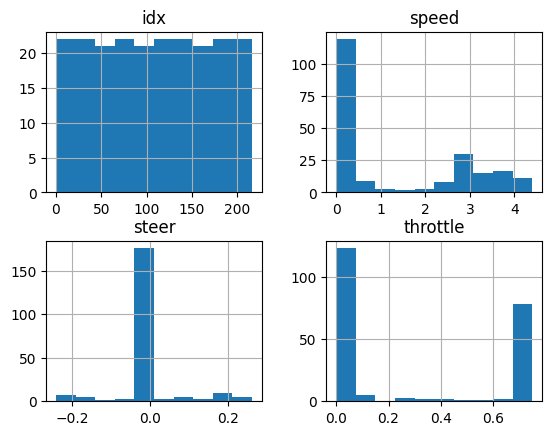

In [6]:
df_measurements.hist()

In [12]:
df_measurements

,idx,speed,steer,throttle
0,33,4.225940e+00,0.002,0.109039
1,121,8.452323e-05,-0.003,0.750000
2,148,-5.008499e-07,-0.000,0.000000
3,111,2.195074e-01,-0.003,0.750000
4,40,2.867534e+00,-0.166,0.750000
...,...,...,...,...
212,34,3.697529e+00,0.005,0.000000
213,53,2.935664e+00,-0.005,0.423816
214,113,6.121542e-02,-0.002,0.750000
215,153,-1.298649e-09,-0.000,0.000000


In [8]:
weighted_sampler.get_restricted_indices()

[0, 153]

In [44]:
weighted_sampler.__len__()

217